In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import astropy.units as u

In [3]:
#DEFINES RECOIL VELOCITY FORMULA

#Assign fitting constants
A = 12000
B = -0.93
H = 7300
K = 60000

#Define recoil velocity operator
def calc_recoil_velocity(q, e, a_1, a_2, xi, phi_1, phi_2, theta):
    p = (q**2)/((1+q)**5)
    a_1_perp = a_1*np.sin(phi_1)
    a_2_perp = a_2*np.sin(phi_2)
    a_1_par = a_1*np.cos(phi_1)
    a_2_par = a_2*np.cos(phi_2)
    v_m = (A*p*(1-q))*(1+(B*(q/((1+q)**2)))) #velocity based on unequal mass
    v_perp =  (H*p)*(a_2_par - q*a_1_par) #velocity perpendicular to orbital angular momentum direction
    v_par = (K*p*np.cos(theta))*(a_2_perp - q*a_1_perp) #velocity parallel to orbital angular momentum direction

    v_rec_vector = [v_m + v_perp*np.cos(xi), v_perp*np.sin(xi), v_par]
    v_rec = (1+e)*(np.linalg.norm(v_rec_vector))
    

    return v_rec

In [7]:
# CREATES RECOIL VELOCITY ARRAYS FOR VARIOUS ORIENTATIONS

# DEFINES FREE PARAMETERS FOR MONTE CARLO

num_simulations = 100000

q = np.random.uniform(0, 1, num_simulations) #choose random mass ratio from uniform distribution
e = np.random.uniform(0, 1, num_simulations) #choose random eccentricity from uniform distribution
a_1 = np.random.uniform(0, 1, num_simulations) #choose random black hole 1 spin from uniform distribution
a_2 = np.random.uniform(0, 1, num_simulations) #choose random black hole 2 spin from uniform distribution
xi = np.random.uniform(0, np.pi*2, num_simulations) #choose random xi(angle between v_m and v_perp) from uniform distribution
phi_1 = np.random.uniform(0, np.pi, num_simulations) #choose random phi (angle between orbital angular momentum and spin direction) from uniform distribution for black hole 1
phi_2 = np.random.uniform(0, np.pi, num_simulations) #choose random phi (angle between orbital angular momentum and spin direction) from uniform distribution for black hole 2
theta = np.random.uniform(0, np.pi*2, num_simulations) #choose random theta (read Campanelli for explanation) from uniform distribution


# SPINS ALIGNED AND PARALLEL TO ORBITAL ANGULAR MOMENTUM

recoil_velocities_eqspinmag_alpar = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], e[n], a_1[n], a_1[n], xi[n], 0, 0, theta[n])
    recoil_velocities_eqspinmag_alpar.append(recoil_velocity)
mean_eq = np.mean(recoil_velocities_eqspinmag_alpar)

recoil_velocities_diffspinmag_alpar = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], e[n], a_1[n], a_2[n], xi[n], 0, 0, theta[n])
    recoil_velocities_diffspinmag_alpar.append(recoil_velocity)
mean_diff = np.mean(recoil_velocities_diffspinmag_alpar)


# SPINS ANTIALIGNED AND PARALLEL TO ORBITAL ANGULAR MOMENTUM

recoil_velocities_eqspinmag_antalpar = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], e[n], a_1[n], -a_1[n], xi[n], 0, 0, theta[n])
    recoil_velocities_eqspinmag_antalpar.append(recoil_velocity)
mean_eq = np.mean(recoil_velocities_eqspinmag_antalpar)

recoil_velocities_diffspinmag_antalpar = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], e[n], a_1[n], -a_2[n], xi[n], 0, 0, theta[n])
    recoil_velocities_diffspinmag_antalpar.append(recoil_velocity)
mean_diff = np.mean(recoil_velocities_diffspinmag_antalpar)


# SPINS ALIGNED AND PERPENDICULAR TO ORBITAL ANGULAR MOMENTUM

recoil_velocities_eqspinmag_alperp = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], e[n], a_1[n], a_1[n], xi[n], np.pi/2, np.pi/2, theta[n])
    recoil_velocities_eqspinmag_alperp.append(recoil_velocity)
mean_eq = np.mean(recoil_velocities_eqspinmag_alperp)

recoil_velocities_diffspinmag_alperp = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], e[n], a_1[n], a_2[n], xi[n], np.pi/2, np.pi/2, theta[n])
    recoil_velocities_diffspinmag_alperp.append(recoil_velocity)
mean_diff = np.mean(recoil_velocities_diffspinmag_alperp)


# SPINS ANTIALIGNED AND PERPENDICULAR TO ORBITAL ANGULAR MOMENTUM

recoil_velocities_eqspinmag_antalperp = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], e[n], a_1[n], -a_1[n], xi[n], np.pi/2, np.pi/2, theta[n])
    recoil_velocities_eqspinmag_antalperp.append(recoil_velocity)
mean_eq = np.mean(recoil_velocities_eqspinmag_antalperp)

recoil_velocities_diffspinmag_antalperp = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], e[n], a_1[n], -a_2[n], xi[n], np.pi/2, np.pi/2, theta[n])
    recoil_velocities_diffspinmag_antalperp.append(recoil_velocity)
mean_diff = np.mean(recoil_velocities_diffspinmag_antalperp)


# SPIN MAGNITUDES AND ORIENTATIONS RANDOM

recoil_velocities_rand = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], e[n], a_1[n], a_2[n], xi[n], phi_1[n], phi_2[n], theta[n])
    recoil_velocities_rand.append(recoil_velocity)
mean = np.mean(recoil_velocities_rand)

In [17]:
# CREATES RECOIL VELOCITY ARRAYS FOR VARIOUS ORIENTATIONS

# DEFINES FREE PARAMETERS FOR MONTE CARLO

num_simulations = 100000

q = np.random.uniform(0, 1, num_simulations) #choose random mass ratio from uniform distribution
e = np.random.uniform(0, 1, num_simulations) #choose random eccentricity from uniform distribution
a_1 = np.random.uniform(0, 1, num_simulations) #choose random black hole 1 spin from uniform distribution
a_2 = np.random.uniform(0, 1, num_simulations) #choose random black hole 2 spin from uniform distribution
xi = np.random.uniform(0, np.pi*2, num_simulations) #choose random xi(angle between v_m and v_perp) from uniform distribution
phi_1 = np.random.uniform(0, np.pi, num_simulations) #choose random phi (angle between orbital angular momentum and spin direction) from uniform distribution for black hole 1
phi_2 = np.random.uniform(0, np.pi, num_simulations) #choose random phi (angle between orbital angular momentum and spin direction) from uniform distribution for black hole 2
theta = np.random.uniform(0, np.pi*2, num_simulations) #choose random theta (read Campanelli for explanation) from uniform distribution


# SPINS ALIGNED AND PARALLEL TO ORBITAL ANGULAR MOMENTUM

recoil_velocities_eqspinmag_alpar = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], 0, a_1[n], a_1[n], np.pi/2, 0, 0, 0)
    recoil_velocities_eqspinmag_alpar.append(recoil_velocity)
mean_eq = np.mean(recoil_velocities_eqspinmag_alpar)

recoil_velocities_diffspinmag_alpar = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], 0, a_1[n], a_2[n], np.pi/2, 0, 0, 0)
    recoil_velocities_diffspinmag_alpar.append(recoil_velocity)
mean_diff = np.mean(recoil_velocities_diffspinmag_alpar)


# SPINS ANTIALIGNED AND PARALLEL TO ORBITAL ANGULAR MOMENTUM

recoil_velocities_eqspinmag_antalpar = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], 0, a_1[n], -a_1[n], np.pi/2, 0, 0, 0)
    recoil_velocities_eqspinmag_antalpar.append(recoil_velocity)
mean_eq = np.mean(recoil_velocities_eqspinmag_antalpar)

recoil_velocities_diffspinmag_antalpar = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], 0, a_1[n], -a_2[n], np.pi/2, 0, 0, 0)
    recoil_velocities_diffspinmag_antalpar.append(recoil_velocity)
mean_diff = np.mean(recoil_velocities_diffspinmag_antalpar)


# SPINS ALIGNED AND PERPENDICULAR TO ORBITAL ANGULAR MOMENTUM

recoil_velocities_eqspinmag_alperp = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], 0, a_1[n], a_1[n], np.pi/2, np.pi/2, np.pi/2, 0)
    recoil_velocities_eqspinmag_alperp.append(recoil_velocity)
mean_eq = np.mean(recoil_velocities_eqspinmag_alperp)

recoil_velocities_diffspinmag_alperp = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], 0, a_1[n], a_2[n], np.pi/2, np.pi/2, np.pi/2, 0)
    recoil_velocities_diffspinmag_alperp.append(recoil_velocity)
mean_diff = np.mean(recoil_velocities_diffspinmag_alperp)


# SPINS ANTIALIGNED AND PERPENDICULAR TO ORBITAL ANGULAR MOMENTUM

recoil_velocities_eqspinmag_antalperp = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], 0, a_1[n], -a_1[n], np.pi/2, np.pi/2, np.pi/2, 0)
    recoil_velocities_eqspinmag_antalperp.append(recoil_velocity)
mean_eq = np.mean(recoil_velocities_eqspinmag_antalperp)

recoil_velocities_diffspinmag_antalperp = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], e[n], a_1[n], -a_2[n], np.pi/2, np.pi/2, np.pi/2, 0)
    recoil_velocities_diffspinmag_antalperp.append(recoil_velocity)
mean_diff = np.mean(recoil_velocities_diffspinmag_antalperp)


# SPIN MAGNITUDES AND ORIENTATIONS RANDOM

recoil_velocities_rand = []
for n in range(num_simulations):
    recoil_velocity = calc_recoil_velocity(q[n], 0, a_1[n], a_2[n], np.pi/2, phi_1[n], phi_2[n], 0)
    recoil_velocities_rand.append(recoil_velocity)
mean = np.mean(recoil_velocities_rand)

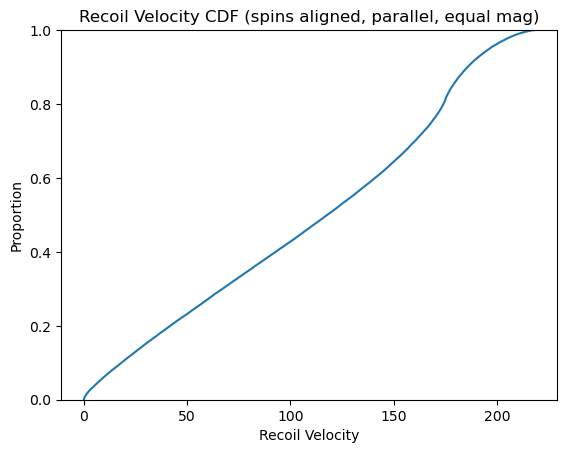

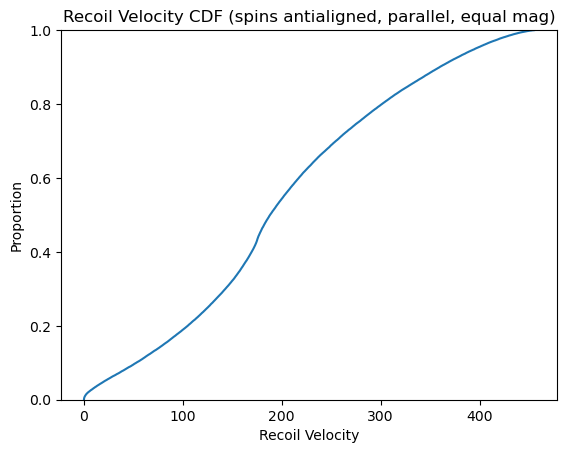

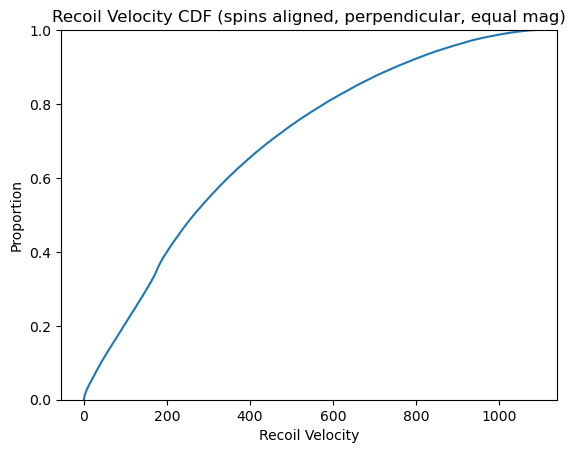

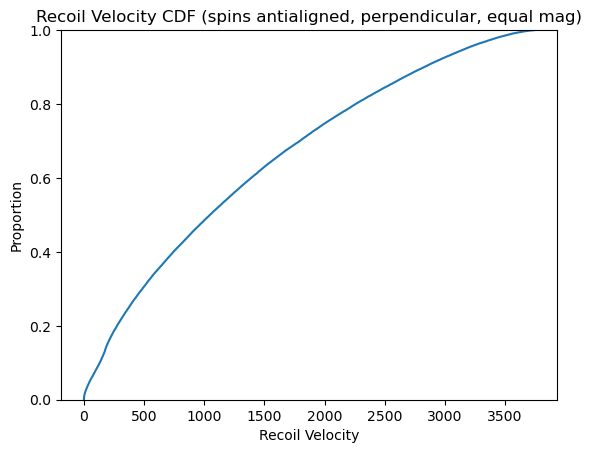

In [21]:
#PLOTS CDF FUNCTIONS AND CALCULATES 80% PROBABILITY

sns.ecdfplot(data = recoil_velocities_eqspinmag_alpar).set_title('Recoil Velocity CDF (spins aligned, parallel, equal mag)')
plt.xlabel('Recoil Velocity')
plt.show()

sns.ecdfplot(data = recoil_velocities_eqspinmag_antalpar).set_title('Recoil Velocity CDF (spins antialigned, parallel, equal mag)')
plt.xlabel('Recoil Velocity')
plt.show()

sns.ecdfplot(data = recoil_velocities_eqspinmag_alperp).set_title('Recoil Velocity CDF (spins aligned, perpendicular, equal mag)')
plt.xlabel('Recoil Velocity')
plt.show()

sns.ecdfplot(data = recoil_velocities_eqspinmag_antalperp).set_title('Recoil Velocity CDF (spins antialigned, perpendicular, equal mag)')
plt.xlabel('Recoil Velocity')
plt.show()